In [1]:
print("Starting Computations....")
# Importing some Useful Libraries

import pandas as pd
import numpy as np

Starting Computations....


In [2]:
print("Disabling TF Warnings....")

# Disabling tf warnings

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Disabling TF Warnings....


## Reading CSVs

In [3]:
print("Reading CSVs......")


digit = pd.read_csv('/Users/moutasemakkad/Desktop/final/Data/mnist_test.csv',header=None, low_memory=False)

alphabet =pd.read_csv('/Users/moutasemakkad/Desktop/final/Data/A_Z Handwritten Data.csv',header=None, low_memory=False)


digit1 = pd.read_csv('/Users/moutasemakkad/Desktop/final/Data/mnist_train.csv',header=None, low_memory=False)

Reading CSVs......


# Relabeling / Merging Data / Preprocessing 

In [4]:
# Since both the digits and the alphabet's labels start from zero, we would have to make them unique. 
# I have added 10 to all the alphabet columns EX: A is now 0+10 => 10

alphabet[0] =  alphabet[0] + 10

In [5]:
#Dropped some label columns that we do not need


digit.drop(digit.index[0], inplace=True)
digit1.drop(digit1.index[0], inplace=True)

print("Dropped Label Columns......")

Dropped Label Columns......


In [6]:
# Merged the the datasets into one DF

# Note: we each row is a vector of 784 pixels, 
# however, the reason why we see that we only have 784 (should be 785 since we have the label column) is because
# It's 0 indexed


df_total = pd.concat([alphabet, digit, digit1])

print("Merged All data into one df......")
df_total.head()

Merged All data into one df......


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# We can verify that here

print(f"Num of features X including label y: {len(df_total.columns)}")

Num of features X including label y: 785


In [8]:
print("Converting Data to Floats......")
# Concatination has turned the value to strings or "Pandas Objects," we had to convert them to Floats

df_total = df_total.astype(float)


Converting Data to Floats......


## Preparing the data for ScikitLearn

Step -1-

In [9]:
# We have to separate the labels from the features to prepare the data for ScikitLearn's "train_test_split()"

y = df_total.iloc[:,0]

X = df_total.drop(labels=0, axis=1)

In [10]:
# Verify that we have the right shape after manipulation

print(f'X shape after dropping the y column: {X.shape}')

X shape after dropping the y column: (442451, 784)


In [11]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step -2-

In [12]:
# We need to convert our DFs to Matrxies or NumpyArrays

y = y.as_matrix()
X = X.as_matrix()
print("Converted to matrix......")

Converted to matrix......


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [13]:
X.shape

(442451, 784)

## Splitting the Data into Training and Testing Data

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:

print("Splitting Data......")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Splitting Data......


In [16]:

len_tarin = len(X_train)

len_test = len(X_test)

In [17]:
X_train.shape

(296442, 784)

In [18]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 36
epochs = 16

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.
/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/PythonData/lib/python3.7/sit

x_train shape: (296442, 28, 28, 1)
296442 train samples
146009 test samples


W1002 18:05:15.423485 4413953472 deprecation.py:323] From /anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 296442 samples, validate on 146009 samples
Epoch 1/16
296442/296442 [==============================] - 299s 1ms/step - loss: 0.4101 - acc: 0.8862 - val_loss: 0.1244 - val_acc: 0.9651
Epoch 2/16
296442/296442 [==============================] - 293s 988us/step - loss: 0.1947 - acc: 0.9456 - val_loss: 0.1088 - val_acc: 0.9691
Epoch 3/16
296442/296442 [==============================] - 292s 985us/step - loss: 0.1630 - acc: 0.9549 - val_loss: 0.0948 - val_acc: 0.9747
Epoch 4/16
296442/296442 [==============================] - 295s 995us/step - loss: 0.1453 - acc: 0.9598 - val_loss: 0.0845 - val_acc: 0.9773
Epoch 5/16
296442/296442 [==============================] - 298s 1ms/step - loss: 0.1330 - acc: 0.9634 - val_loss: 0.0789 - val_acc: 0.9780
Epoch 6/16
296442/296442 [==============================] - 295s 994us/step - loss: 0.1261 - acc: 0.9656 - val_loss: 0.0739 - val_acc: 0.9798
Epoch 7/16
296442/296442 [==============================] - 295s 995us/step - loss: 0.1202 - acc: 0.

In [19]:
# model.evaluate(X_test,y_test)

In [20]:
model_json = model.to_json()
with open("model_json", "w") as json_file:
 json_file.write(model_json)
model.save("modellabeledfinal.h5")

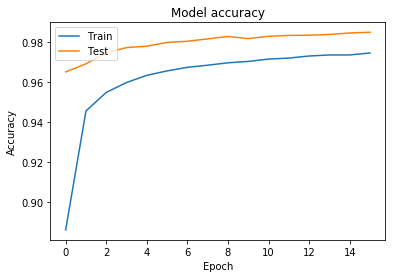

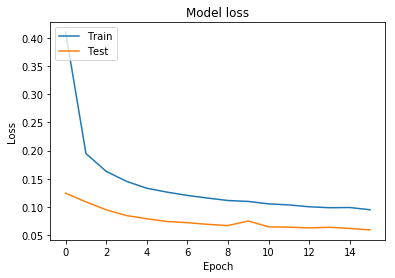

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(36),
                  range(36))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (146009, 784)

In [ ]:
np.argmax(model.predict(X_test[1].reshape(1,28,28,1)))

In [ ]:
c = X_test[1].reshape(28,28)

In [ ]:
plt.imshow(c, cmap='gray')
plt.show()

In [ ]:
d = X_test[100].reshape(28,28)

In [ ]:
plt.imshow(d, cmap='gray')
plt.show()

In [23]:
np.argmax(model.predict(X_test[100].reshape(1,28,28,1)))

24

In [24]:
e = X_test[1000].reshape(28,28)

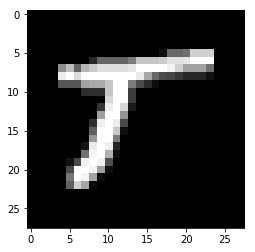

In [25]:
plt.imshow(e, cmap='gray')
plt.show()

In [26]:
np.argmax(model.predict(X_test[1000].reshape(1,28,28,1)))

23

TypeError: list indices must be integers or slices, not float